# Proje 2

(Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

- 1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
- 2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
- 3. İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
- 4. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
- 5. 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
- 6. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
- 7. IMDB puanı en yüksek olan ilk 10 film hangileridir?
- 8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
- 9. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
- 10. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
- 11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
- 12. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
- 13. Hangi yılın toplam "runtime" süresi en fazladır?
- 14. Her bir dilin en fazla kullanıldığı "Genre" nedir?
- 15. Veri setinde outlier veri var mıdır? Açıklayınız.

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('NetflixOriginals.csv', encoding="latin-1" )

In [36]:
df.head()
# df.tail()   df.describe()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


### 1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'En çok kullanılan Diller')

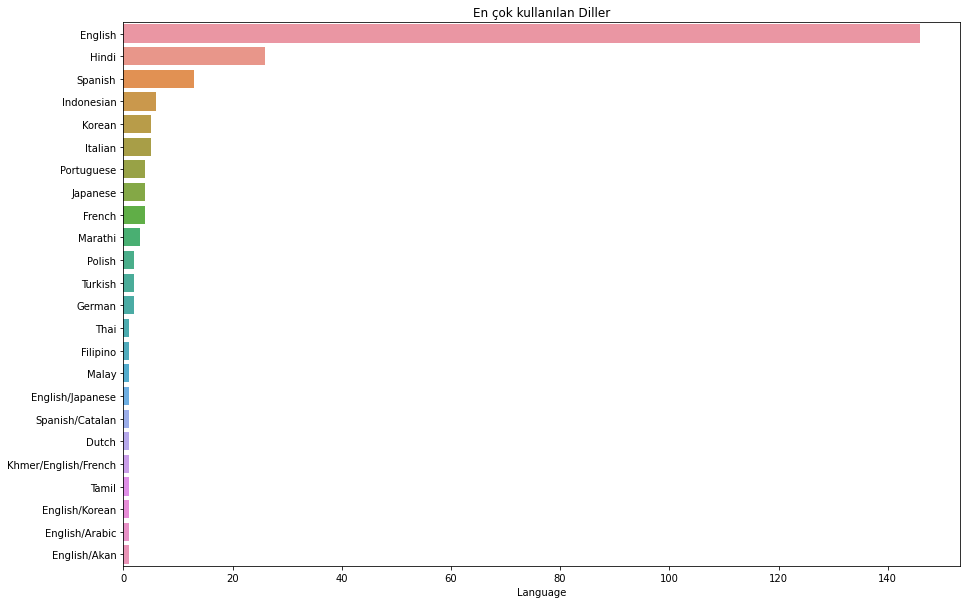

In [37]:
uzun_sureli_filmler = df[df['Runtime'] > 100]["Language"].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(uzun_sureli_filmler, uzun_sureli_filmler.index)
plt.title('En çok kullanılan Diller')

### 2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri")

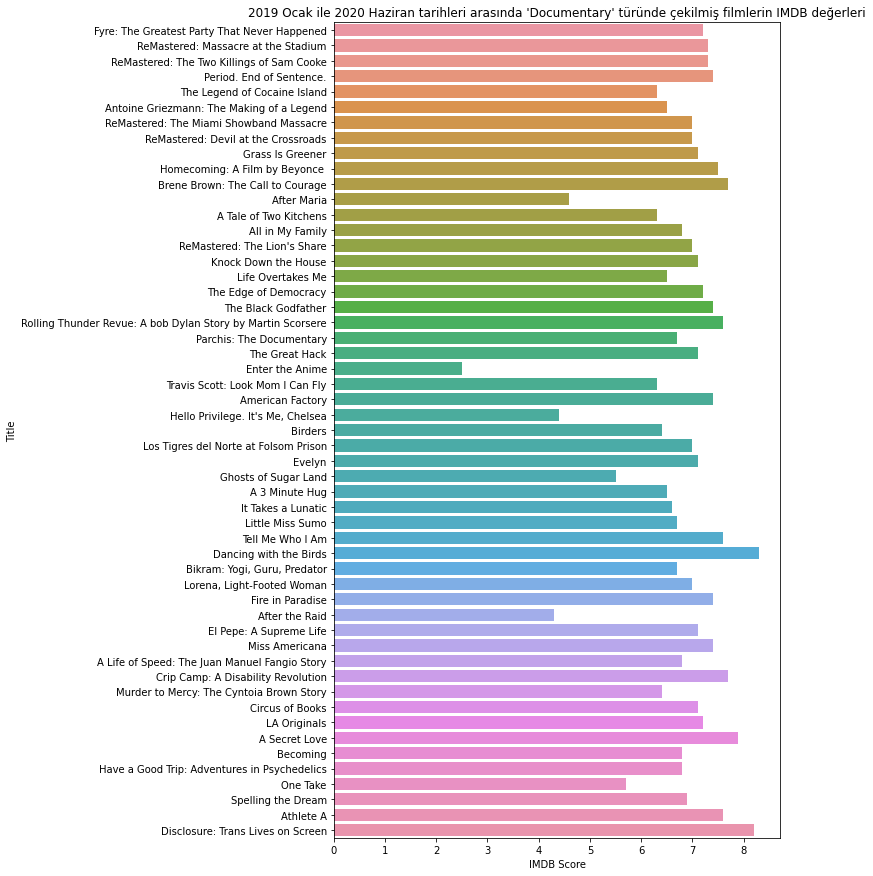

In [39]:
df["Date"] = pd.to_datetime(df.Premiere)
df['Yıl'] = df['Date'].dt.year
df['Ay'] = df['Date'].dt.month
film_ = df[df["Genre"] == "Documentary"].sort_values(["Yıl", "Ay"]) 
film_1 = film_[film_["Yıl"] == 2019]
film_2020 = film_[film_["Yıl"] == 2020]
film_2 = film_2020[film_2020["Ay"] <= 6]

filmler_imdb = pd.concat([film_1, film_2], axis=0)
plt.figure(figsize=(8,15))
sns.barplot(filmler_imdb["IMDB Score"], filmler_imdb["Title"])
plt.title("2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri")

### 3.  İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [40]:
ingilizce_filmler = df[df["Language"] == "English"].groupby("Genre") # Filmelerden İngilizce olanları, türüne göre grupladık
en_yuksek = ingilizce_filmler["IMDB Score"].max().reset_index(name = 'Maksimum') # IMDB skoru en yüksek olanları yeni bir sutunda indexliyoruz
en_yuksek.sort_values('Maksimum', ascending=False)

,Genre,Maksimum
40,Documentary,9.0
67,One-man show,8.5
35,Concert Film,8.4
16,Animation/Christmas/Comedy/Adventure,8.2
41,Drama,7.9
...,...,...
20,Anime / Short,4.7
88,Superhero-Comedy,4.4
68,Political thriller,4.3
65,Musical/Western/Fantasy,3.9


### 4. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [41]:
hint_filmler = df[df["Language"] == "Hindi"]
ortalama = hint_filmler["Runtime"].mean()
ortalama

115.78787878787878

### 5. 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Film Türleri')

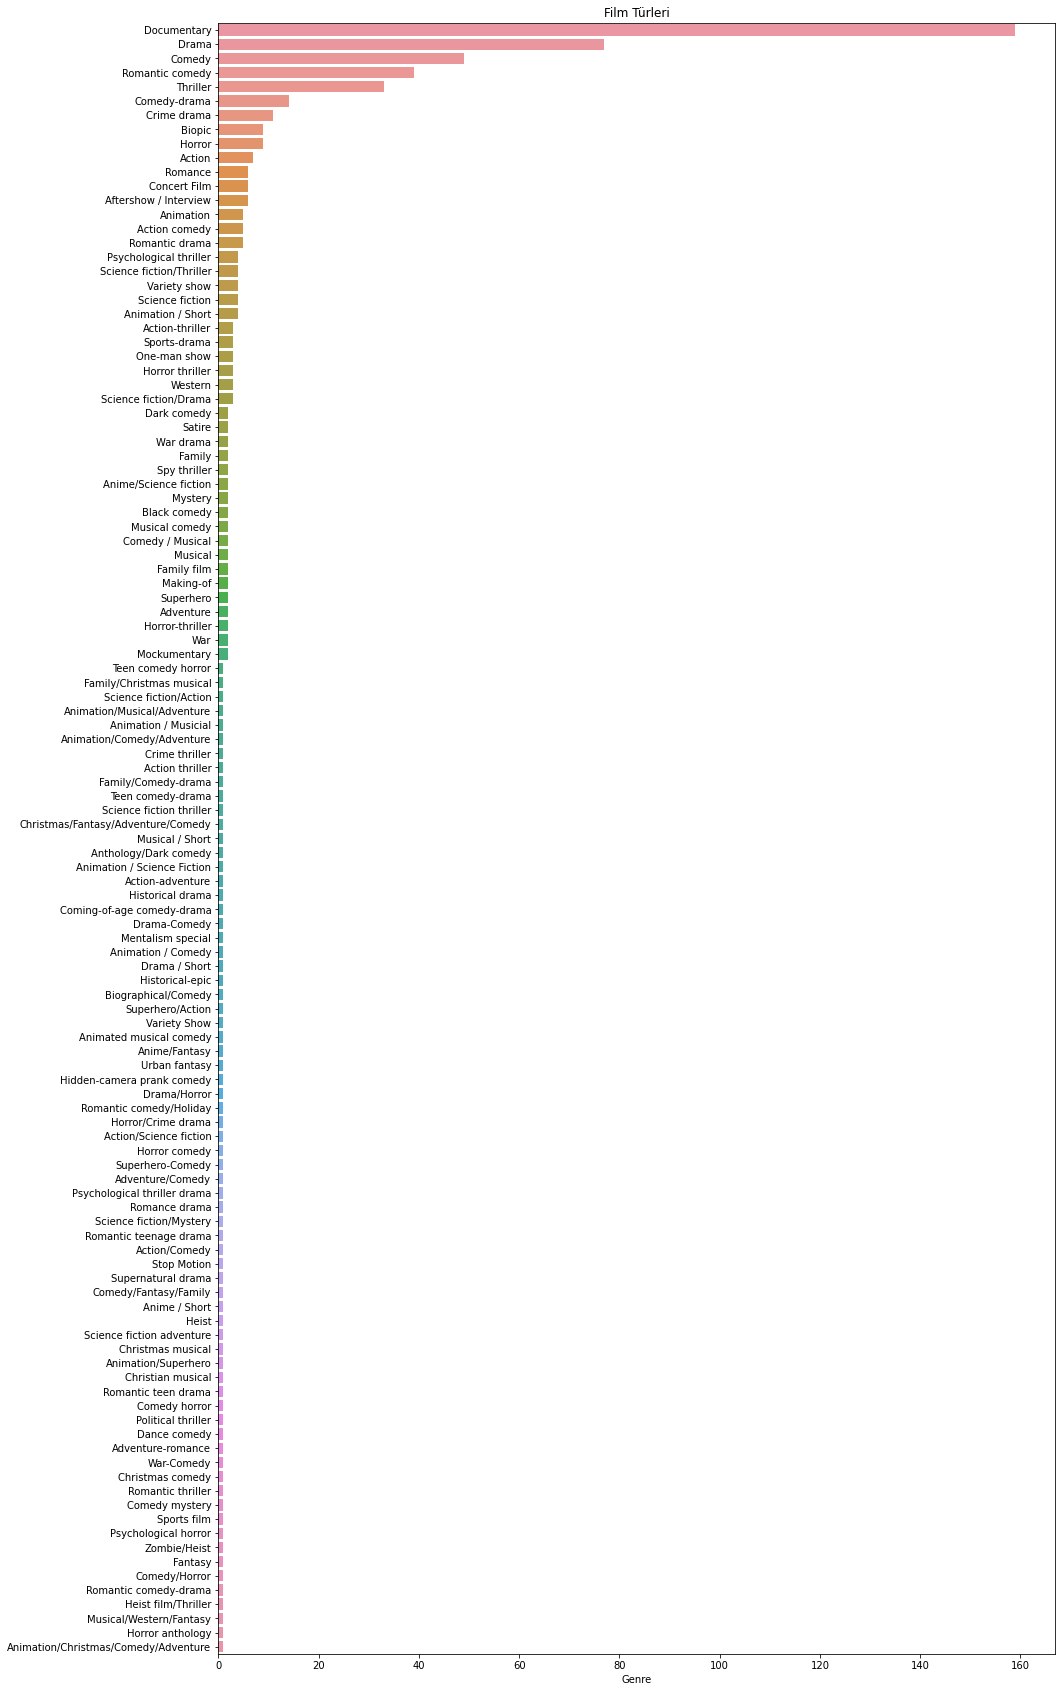

In [42]:
turler = df["Genre"].value_counts()  # Length: 115 olduğu için 115 kategori var.
plt.figure(figsize=(15,30))
sns.barplot(turler, turler.index)
plt.title('Film Türleri')

### 6. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [43]:
df['Language'].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

### 7. IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [44]:
df.sort_values("IMDB Score", ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Yıl,Ay
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04,2020,10
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08,2020,12
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16,2018,12
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09,2015,10
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31,2018,12
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20,2020,5
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23,2019,10
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24,2017,11
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15,2019,11
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07,2016,10


### 8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [45]:
df_korelasyon = df[["IMDB Score", "Runtime"]]
df_korelasyon.corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


<AxesSubplot:>

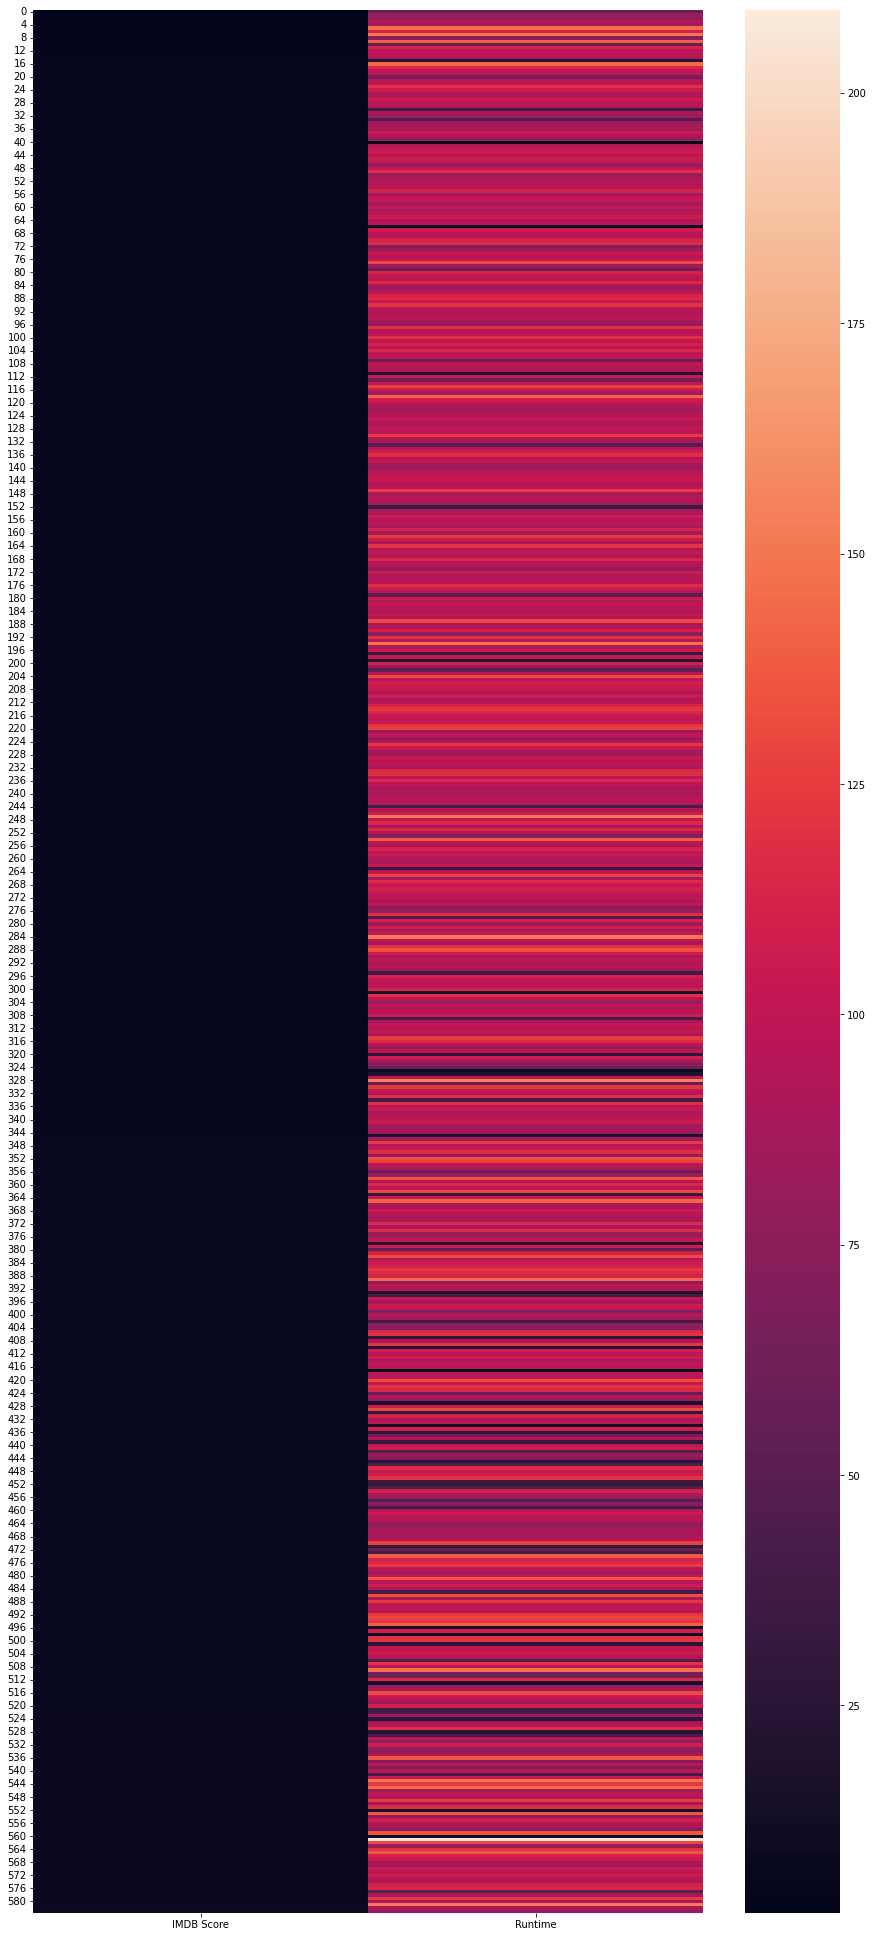

In [46]:
plt.figure(figsize=(15, 35))
sns.heatmap(df_korelasyon)

### 9. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [47]:
filmler = df.groupby("Genre")["IMDB Score"] # Filmeleri türüne göre grupladık
en_yuksek = filmler.max().reset_index(name = 'IMDB Puanı') # IMDB skoru en yüksek olanları yeni bir sutunda indexliyoruz
sonuc = en_yuksek.sort_values('IMDB Puanı', ascending=False).head(10)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'IMDB Puanı En Yüksek 10 Film Türü')

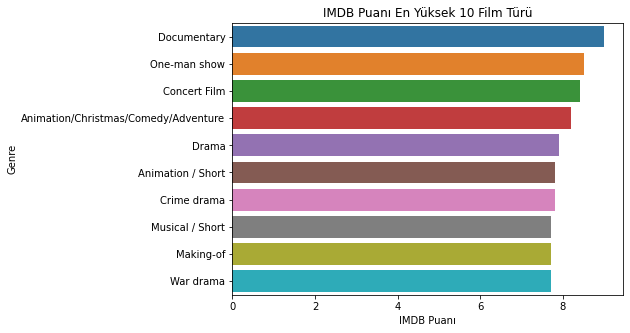

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(sonuc["IMDB Puanı"], sonuc["Genre"])
plt.title("IMDB Puanı En Yüksek 10 Film Türü")

### 10. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'En uzun süreli 10 Film')

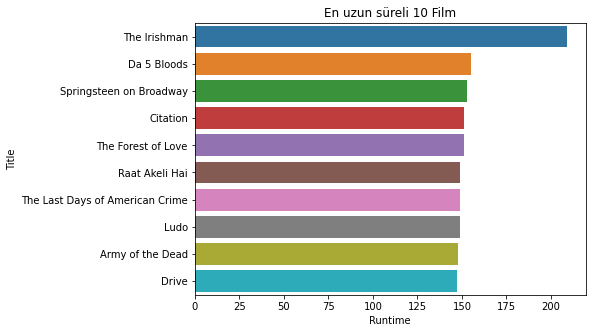

In [49]:
uzun_filmler = df.sort_values('Runtime', ascending=False).head(10)
plt.figure(figsize=(7,5))
sns.barplot(uzun_filmler["Runtime"], uzun_filmler["Title"])
plt.title("En uzun süreli 10 Film")

### 11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

Text(0.5, 1.0, 'Yıllara Göre Film Sayıları')

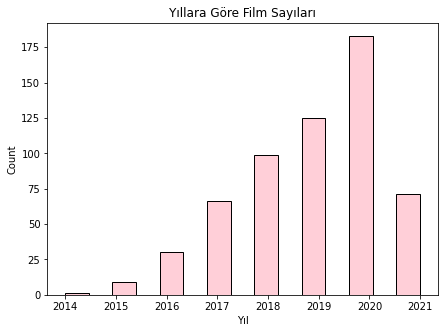

In [50]:
cok_film = df["Yıl"].value_counts()
plt.figure(figsize=(7, 5))
sns.histplot(x='Yıl', data=df, bins=15, color='pink')
plt.title("Yıllara Göre Film Sayıları")

### 12. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

Text(0.5, 1.0, 'Dillere Göre En Düşük IMDB Ortalamaya Sahip Filmler')

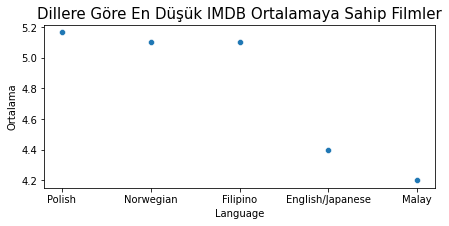

In [51]:
df_= df.groupby('Language')['IMDB Score'].mean().reset_index(name='Ortalama').sort_values('Ortalama', ascending=False).tail()
plt.figure(figsize=(7,3))
sns.scatterplot(x='Language', y= 'Ortalama', data =df_ )
plt.title("Dillere Göre En Düşük IMDB Ortalamaya Sahip Filmler", fontsize=15)

### 13.  Hangi yılın toplam "runtime" süresi en fazladır?

In [52]:
toplam_sureler = df.groupby("Yıl")["Runtime"].sum().sort_values(ascending=False).reset_index(name="Toplam Süre")
toplam_sureler

,Yıl,Toplam Süre
0,2020,17384
1,2019,10856
2,2018,9405
3,2021,7214
4,2017,6129
5,2016,2766
6,2015,814
7,2014,81


### 14. Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [53]:
df.groupby("Language")["Genre"].max()

Language
Bengali                                        Documentary
Dutch                                      Romantic comedy
English                                       Zombie/Heist
English/Akan                                     War drama
English/Arabic                                 Documentary
English/Hindi                                  Documentary
English/Japanese                               Documentary
English/Korean                            Action-adventure
English/Mandarin                               Documentary
English/Russian                                Documentary
English/Spanish                                Documentary
English/Swedish                                Documentary
English/Taiwanese/Mandarin                           Drama
English/Ukranian/Russian                       Documentary
Filipino                                          Thriller
French                                            Thriller
Georgian                                       

### 15. Veri setinde outlier veri var mıdır? Açıklayınız.

Kutu grafiğinde en solda ve en sağda nokta ile belirtilen değerler aykırı veri olarak değerlendirilir.

<AxesSubplot:xlabel='IMDB Score'>

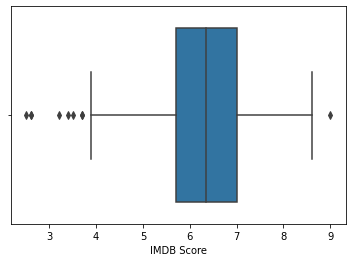

In [54]:
sns.boxplot(x = df["IMDB Score"])

- Yukarıdaki IMDB skorları grafiğinde en solda ve en sağda nokta ile belirtilen skorlar aykırı veri olarak değerlendirilebilir.

<AxesSubplot:xlabel='Runtime'>

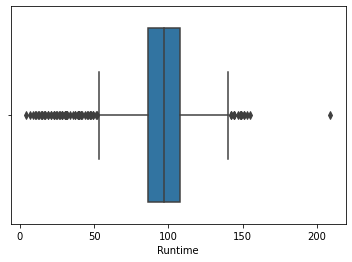

In [55]:
sns.boxplot(x = df["Runtime"])

- Sürelere ait grafikte daha fazla aykırı veri görülüyor.